# Project description
You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.
# Description of the plans
Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

Surf
1. Monthly charge: $20
2. 500 monthly minutes, 50 texts, and 15 GB of data
3. After exceeding the package limits:
1 min 3 cents

Ultimate
1. Monthly charge: $70
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:
1 minute 1 cent



# Plan:
1. Open the data file and study the general information #
2. Prepare the data
3. Analyze the data
4. Test the hypotheses
5. Write an overall conclusion

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import math
from datetime import datetime
import seaborn as sns

### Open the data file and study the general information

In [2]:
calls_data = pd.read_csv('/datasets/megaline_calls.csv') #calls table
internet_data = pd.read_csv('/datasets/megaline_internet.csv') #internet table
messages_data = pd.read_csv('/datasets/megaline_messages.csv') #messages table
plans_data = pd.read_csv('/datasets/megaline_plans.csv') #plans table
users_data = pd.read_csv('/datasets/megaline_users.csv') #users table

The calls table (data on calls):
- `id` — unique call identifier
-`call_date` — call date
-`duration` — call duration (in minutes)
-`user_id` — the identifier of the user making the call

The messages table (data on texts):     
- `id` — unique text message identifier
- `message_date` — text message date
- `user_id` — the identifier of the user sending the text

The plans table (data on the plans):
- `plan_name` — calling plan name
- `usd_monthly_fee` — monthly charge in US dollars
- `minutes_included` — monthly minute allowance
- `messages_included` — monthly text allowance
- `mb_per_month_included` — data volume allowance (in megabytes)
- `usd_per_minute` — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- `usd_per_message` — price per text after exceeding the package limits
- `usd_per_gb` — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

The users table (data on users):
- `user_id` — unique user identifier
-`first_name` — user's name
-`last_name` — user's last name
-`age` — user's age (years)
-`reg_date` — subscription date (dd, mm, yy)
-`churn_date` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
-`city` — user's city of residence
-`plan` — calling plan name

In [3]:
calls_data.info()
calls_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [4]:
internet_data.info()
internet_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [5]:
messages_data.info()
messages_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [6]:
plans_data.info()
plans_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [7]:
users_data.info()
users_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


We opened data frames and checked the general information and description.

In [8]:
#check duplicates
print('Duplicates in calls table', calls_data.duplicated().sum())
print('Duplicates in internet table', internet_data.duplicated().sum())
print('Duplicates in messages table', messages_data.duplicated().sum())
print('Duplicates in plans table', plans_data.duplicated().sum())
print('Duplicates in users table', users_data.duplicated().sum())

Duplicates in calls table 0
Duplicates in internet table 0
Duplicates in messages table 0
Duplicates in plans table 0
Duplicates in users table 0


Thare are no duplicates in datasets.

In [9]:
#check missing data
print('The number of missing data in calls table: ', calls_data.isnull().sum())
print('The number of missing data in internet table: ', internet_data.isnull().sum())
print('The number of missing data in messages table: ', messages_data.isnull().sum())
print('The number of missing data in plans table: ', plans_data.isnull().sum())
print('The number of missing data in users table: ', users_data.isnull().sum())

The number of missing data in calls table:  id           0
user_id      0
call_date    0
duration     0
dtype: int64
The number of missing data in internet table:  id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
The number of missing data in messages table:  id              0
user_id         0
message_date    0
dtype: int64
The number of missing data in plans table:  messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
The number of missing data in users table:  user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


We have missing values in the last table in churn_date column but in description 'churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)' so later we will fix it.

### Prepare the data

We start to work with calls_data table. Here we are interested in call_date and duration columns.

In [10]:
calls_data.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [11]:
calls_data.sample(5)

,id,user_id,call_date,duration
88100,1324_144,1324,2018-10-28,1.29
115598,1404_392,1404,2018-10-10,6.20
14792,1060_174,1060,2018-12-26,14.72
83599,1305_3,1305,2018-07-24,4.99
51179,1185_217,1185,2018-11-11,10.86


For our task call_date for every user is not important. Each plan pays monthly so more intersting to group the duration of call for each client by mounth.

In [12]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format = '%Y-%m-%d')
calls_data['call_date']

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]

Because Megaline rounds seconds up to minutes, we need to round duration.

In [13]:
calls_data['duration'] = np.ceil(calls_data['duration'])

In [14]:
calls_data['duration'].describe()

count    137735.000000
mean          7.146673
std           5.953919
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

In [15]:
calls_data['duration'] = calls_data['duration'].replace(0,1)
calls_data['duration'].describe()

count    137735.000000
mean          7.341496
std           5.728989
min           1.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

And calls in month

In [16]:
calls_data['month'] = np.array(calls_data['call_date']).astype('datetime64[M]')
calls_data['month']

0        2018-12-01
1        2018-12-01
2        2018-12-01
3        2018-12-01
4        2018-12-01
            ...    
137730   2018-11-01
137731   2018-10-01
137732   2018-09-01
137733   2018-10-01
137734   2018-12-01
Name: month, Length: 137735, dtype: datetime64[ns]

In [17]:
calls_data['month'] = calls_data['month'].dt.month
calls_data.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


Now we need to group this calls in month to know The number of calls made and minutes used per month.

In [18]:
calls_data_grouped = calls_data.groupby(by = ['user_id', 'month'])['duration'].agg(['count','sum'])
calls_data_grouped.head()

count    sum
user_id month              
1000    12        16  124.0
1001    8         27  187.0
        9         49  326.0
        10        65  411.0
        11        64  441.0

Let's look on messages table.

In [19]:
messages_data.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [20]:
messages_data.sample(5)

,id,user_id,message_date
35529,1230_74,1230,2018-12-19
3616,1037_13,1037,2018-12-26
21775,1132_1257,1132,2018-10-02
35214,1224_238,1224,2018-08-14
71179,1465_54,1465,2018-06-28


We need to know the number of text messages sent per month

In [21]:
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format = '%Y-%m-%d')
messages_data['message_date']
messages_data['month'] = messages_data['message_date'].dt.month
messages_data.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [22]:
messages_data_grouped = messages_data.groupby(by = ['user_id', 'month'])['id'].agg(['count'])
messages_data_grouped.head()

count
user_id month       
1000    12        11
1001    8         30
        9         44
        10        53
        11        36

In [23]:
messages_data_grouped.columns = ['messages_count']
messages_data_grouped.head()

messages_count
user_id month                
1000    12                 11
1001    8                  30
        9                  44
        10                 53
        11                 36

We found the number of text messages sent per month

Check the volume of data per month

In [24]:
internet_data.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [25]:
internet_data.sample(5)

,id,user_id,session_date,mb_used
74412,1349_220,1349,2018-12-04,547.39
61267,1277_570,1277,2018-06-17,432.62
29112,1133_107,1133,2018-10-28,218.55
67263,1312_486,1312,2018-09-24,341.08
26812,1123_307,1123,2018-11-06,262.14


In [26]:
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format = '%Y-%m-%d')
internet_data['session_date']
internet_data['month'] = internet_data['session_date'].dt.month
internet_data.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [27]:
internet_data.drop(['session_date'], axis='columns', inplace=True)
internet_data.head()

,id,user_id,mb_used,month
0,1000_13,1000,89.86,12
1,1000_204,1000,0.00,12
2,1000_379,1000,660.40,12
3,1000_413,1000,270.99,12
4,1000_442,1000,880.22,12


In [28]:
internet_data_grouped = internet_data.groupby(by = ['user_id', 'month'])['mb_used'].sum()
internet_data_grouped.head()

user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
Name: mb_used, dtype: float64

Here we can see quantity and duration of internet sessions.

Now we will find the monthly revenue from each user.Firstly we will merge columns.

In [29]:
data_internet_pivot = internet_data.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index() 
data_internet_pivot.head()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [30]:
data_calls_pivot = calls_data.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()  
data_calls_pivot.head()

,user_id,month,duration
0,1000,12,124.0
1,1001,8,187.0
2,1001,9,326.0
3,1001,10,411.0
4,1001,11,441.0


In [31]:
data_messages_pivot = messages_data_grouped.pivot_table(index=['user_id', 'month'], values='messages_count', aggfunc='sum').reset_index()  
data_messages_pivot.head()

,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [32]:
all_data = data_internet_pivot.merge(data_calls_pivot.merge(data_messages_pivot, how='outer', on=['user_id', 'month']),
                    how='outer', on=['user_id', 'month'])
all_data = all_data.fillna(0)
all_data.head()

,user_id,month,mb_used,duration,messages_count
0,1000,12,1901.47,124.0,11.0
1,1001,8,6919.15,187.0,30.0
2,1001,9,13314.82,326.0,44.0
3,1001,10,22330.49,411.0,53.0
4,1001,11,18504.30,441.0,36.0


In [33]:
all_data.duplicated().sum()

0

In [34]:
all_data = pd.merge(all_data, users_data, how='outer', left_on = ['user_id'], right_on = ['user_id'])
all_data.head(5)

,user_id,month,mb_used,duration,messages_count,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12.0,1901.47,124.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,8.0,6919.15,187.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1001,9.0,13314.82,326.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
3,1001,10.0,22330.49,411.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
4,1001,11.0,18504.30,441.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


In [35]:
all_data = pd.merge(all_data, plans_data, how='left', left_on = 'plan', right_on = 'plan_name')
all_data.head()

,user_id,month,mb_used,duration,messages_count,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12.0,1901.47,124.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8.0,6919.15,187.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
2,1001,9.0,13314.82,326.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
3,1001,10.0,22330.49,411.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,surf
4,1001,11.0,18504.30,441.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,50,15360,500,20,10,0.03,0.03,surf


In [36]:
all_data.duplicated().sum()

0

In [37]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2303 non-null   int64  
 1   month                  2293 non-null   float64
 2   mb_used                2293 non-null   float64
 3   duration               2293 non-null   float64
 4   messages_count         2293 non-null   float64
 5   first_name             2303 non-null   object 
 6   last_name              2303 non-null   object 
 7   age                    2303 non-null   int64  
 8   city                   2303 non-null   object 
 9   reg_date               2303 non-null   object 
 10  plan                   2303 non-null   object 
 11  churn_date             160 non-null    object 
 12  messages_included      2303 non-null   int64  
 13  mb_per_month_included  2303 non-null   int64  
 14  minutes_included       2303 non-null   int64  
 15  usd_

In [38]:
all_data['users_monthly_calls'] = all_data['duration'] - all_data['minutes_included']
all_data['users_monthly_messages'] = all_data['messages_count'] - all_data['messages_included']
all_data['users_monthly_internet'] = all_data['mb_used'] - all_data['mb_per_month_included']
all_data.head()

,user_id,month,mb_used,duration,messages_count,first_name,last_name,age,city,reg_date,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,users_monthly_calls,users_monthly_messages,users_monthly_internet
0,1000,12.0,1901.47,124.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,30720,3000,70,7,0.01,0.01,ultimate,-2876.0,-989.0,-28818.53
1,1001,8.0,6919.15,187.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,-313.0,-20.0,-8440.85
2,1001,9.0,13314.82,326.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,-174.0,-6.0,-2045.18
3,1001,10.0,22330.49,411.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,-89.0,3.0,6970.49
4,1001,11.0,18504.30,441.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,-59.0,-14.0,3144.30


In [39]:
#change from mb to gb
all_data['users_monthly_internet'] = all_data['users_monthly_internet']/1024
all_data.head()

,user_id,month,mb_used,duration,messages_count,first_name,last_name,age,city,reg_date,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,users_monthly_calls,users_monthly_messages,users_monthly_internet
0,1000,12.0,1901.47,124.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,30720,3000,70,7,0.01,0.01,ultimate,-2876.0,-989.0,-28.143096
1,1001,8.0,6919.15,187.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,-313.0,-20.0,-8.243018
2,1001,9.0,13314.82,326.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,-174.0,-6.0,-1.997246
3,1001,10.0,22330.49,411.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,-89.0,3.0,6.807119
4,1001,11.0,18504.30,441.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,15360,500,20,10,0.03,0.03,surf,-59.0,-14.0,3.070605


In [40]:
#change from mb to gb
all_data['gb_per_month_included'] = all_data['mb_per_month_included']/1024
all_data.head()

,user_id,month,mb_used,duration,messages_count,first_name,last_name,age,city,reg_date,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,users_monthly_calls,users_monthly_messages,users_monthly_internet,gb_per_month_included
0,1000,12.0,1901.47,124.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,3000,70,7,0.01,0.01,ultimate,-2876.0,-989.0,-28.143096,30.0
1,1001,8.0,6919.15,187.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,500,20,10,0.03,0.03,surf,-313.0,-20.0,-8.243018,15.0
2,1001,9.0,13314.82,326.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,500,20,10,0.03,0.03,surf,-174.0,-6.0,-1.997246,15.0
3,1001,10.0,22330.49,411.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,500,20,10,0.03,0.03,surf,-89.0,3.0,6.807119,15.0
4,1001,11.0,18504.30,441.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,500,20,10,0.03,0.03,surf,-59.0,-14.0,3.070605,15.0


In [41]:
all_data.sample(5)

,user_id,month,mb_used,duration,messages_count,first_name,last_name,age,city,reg_date,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,users_monthly_calls,users_monthly_messages,users_monthly_internet,gb_per_month_included
2193,1478,8.0,12170.58,227.0,5.0,Elane,David,51,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-28,...,3000,70,7,0.01,0.01,ultimate,-2773.0,-995.0,-18.114668,30.0
901,1187,10.0,16974.86,729.0,11.0,Tanner,Goodman,49,"Austin-Round Rock-Georgetown, TX MSA",2018-02-20,...,500,20,10,0.03,0.03,surf,229.0,-39.0,1.577012,15.0
365,1077,5.0,23068.75,670.0,77.0,Chau,Webster,23,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-01-14,...,3000,70,7,0.01,0.01,ultimate,-2330.0,-923.0,-7.471924,30.0
1149,1245,11.0,12283.49,189.0,15.0,Quinn,David,30,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-19,...,500,20,10,0.03,0.03,surf,-311.0,-35.0,-3.004404,15.0
1754,1377,12.0,23570.07,380.0,1.0,Vallie,Conway,18,"Rochester, NY MSA",2018-03-27,...,500,20,10,0.03,0.03,surf,-120.0,-49.0,8.017646,15.0


In [74]:
def revenue(row):
    calls = row['users_monthly_calls']
    messages = row['users_monthly_messages']
    internet = row['users_monthly_internet']
    
    if calls > 0:
        calls_cost = calls*row['usd_per_minute']
    else:
        calls_cost =  row['usd_monthly_pay']   
    
    if messages>0:
        messages_cost = messages*row['usd_per_message']
    else:
        messages_cost=row['usd_monthly_pay']
        
    if internet>0:
        internet_cost=internet*row['usd_per_gb']
    else:
        internet_cost = row['usd_monthly_pay']
        
    monthly_revenue=calls_cost+messages_cost+internet_cost
    return monthly_revenue        

In [75]:
all_data['monthly_revenue']=all_data.apply(revenue,axis=1)
all_data.head()

,user_id,month,mb_used,duration,messages_count,first_name,last_name,age,city,reg_date,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,users_monthly_calls,users_monthly_messages,users_monthly_internet,gb_per_month_included,monthly_revenue
0,1000,12.0,1901.47,9.0,11.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,70,7,0.01,0.01,ultimate,-2876.0,-989.0,-28.0,30.0,210.00
1,1001,8.0,6919.15,14.0,30.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,20,10,0.03,0.03,surf,-313.0,-20.0,-8.0,15.0,60.00
2,1001,9.0,13314.82,15.0,44.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,20,10,0.03,0.03,surf,-174.0,-6.0,-1.0,15.0,60.00
3,1001,10.0,22330.49,6.0,53.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,20,10,0.03,0.03,surf,-89.0,3.0,7.0,15.0,90.09
4,1001,11.0,18504.30,5.0,36.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,20,10,0.03,0.03,surf,-59.0,-14.0,4.0,15.0,80.00


In [44]:
all_data.duplicated().sum()

0

In [45]:
all_data.sample(10)

,user_id,month,mb_used,duration,messages_count,first_name,last_name,age,city,reg_date,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,users_monthly_calls,users_monthly_messages,users_monthly_internet,gb_per_month_included,monthly_revenue
1683,1362,8.0,14741.83,690.0,71.0,Kenyetta,Mcknight,65,"Denver-Aurora-Lakewood, CO MSA",2018-01-18,...,20,10,0.03,0.03,surf,190.0,21.0,-0.603682,15.0,26.330000
573,1122,7.0,16299.25,371.0,19.0,Lashay,Reese,57,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-04,...,20,10,0.03,0.03,surf,-129.0,-31.0,0.917236,15.0,49.172363
2245,1492,9.0,3173.95,39.0,11.0,Elvie,Jones,63,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,...,20,10,0.03,0.03,surf,-461.0,-39.0,-11.900439,15.0,60.000000
362,1077,2.0,19926.55,803.0,67.0,Chau,Webster,23,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-01-14,...,70,7,0.01,0.01,ultimate,-2197.0,-933.0,-10.540479,30.0,210.000000
253,1059,4.0,3672.48,224.0,20.0,Avril,Richardson,34,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-22,...,70,7,0.01,0.01,ultimate,-2776.0,-980.0,-26.413594,30.0,210.000000
1598,1346,11.0,19625.68,264.0,61.0,Emmie,Gonzalez,59,"Tucson, AZ MSA",2018-04-26,...,70,7,0.01,0.01,ultimate,-2736.0,-939.0,-10.834297,30.0,210.000000
249,1057,11.0,35090.02,1062.0,111.0,Theo,Sargent,18,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-08-07,...,70,7,0.01,0.01,ultimate,-1938.0,-889.0,4.267598,30.0,169.873184
1331,1284,12.0,21317.66,982.0,0.0,Yuri,Odom,51,"Dayton-Kettering, OH MSA",2018-09-07,...,20,10,0.03,0.03,surf,482.0,-50.0,5.818027,15.0,92.640273
1064,1223,9.0,20408.31,663.0,27.0,Patience,Wilson,37,"Phoenix-Mesa-Chandler, AZ MSA",2018-07-05,...,20,10,0.03,0.03,surf,163.0,-23.0,4.929990,15.0,74.189902
2298,1307,NaN,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,...,20,10,0.03,0.03,surf,NaN,NaN,NaN,15.0,60.000000


In [46]:
all_data['duration'] = np.ceil(calls_data['duration'])

In [47]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 2303 non-null   int64  
 1   month                   2293 non-null   float64
 2   mb_used                 2293 non-null   float64
 3   duration                2303 non-null   float64
 4   messages_count          2293 non-null   float64
 5   first_name              2303 non-null   object 
 6   last_name               2303 non-null   object 
 7   age                     2303 non-null   int64  
 8   city                    2303 non-null   object 
 9   reg_date                2303 non-null   object 
 10  plan                    2303 non-null   object 
 11  churn_date              160 non-null    object 
 12  messages_included       2303 non-null   int64  
 13  mb_per_month_included   2303 non-null   int64  
 14  minutes_included        2303 non-null   

In [48]:
all_data['users_monthly_messages'] = np.ceil(all_data['users_monthly_messages'])

### Analyze the data

 Calculate the mean, variance, and standard deviation. 

In [77]:
all_data.pivot_table(index= 'plan', values= ['duration','users_monthly_messages','users_monthly_internet'], aggfunc= ['mean', 'var','std'])

mean                                                      var  \
          duration users_monthly_internet users_monthly_messages   duration   
plan                                                                          
surf      7.298290               1.670693             -18.840432  33.030739   
ultimate  7.335635             -12.693056            -962.448611  34.925921   

                                                             std  \
         users_monthly_internet users_monthly_messages  duration   
plan                                                               
surf                   61.58360            1126.724522  5.747237   
ultimate               58.83055            1208.756744  5.909816   

                                                        
         users_monthly_internet users_monthly_messages  
plan                                                    
surf                   7.847522              33.566717  
ultimate               7.670108              34.767179

array([<AxesSubplot:title={'center':'surf'}>,
       <AxesSubplot:title={'center':'ultimate'}>], dtype=object)

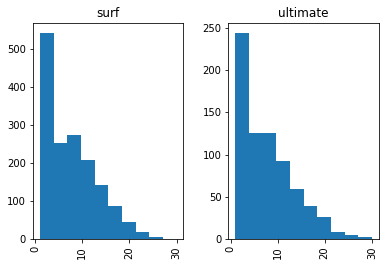

In [78]:
all_data.duration.hist(by=all_data['plan'])

In [79]:
all_data.groupby(['plan'])['duration'].agg(['mean','median']).reset_index()

,plan,mean,median
0,surf,7.298290,6.0
1,ultimate,7.335635,6.0


<AxesSubplot:xlabel='duration', ylabel='Count'>

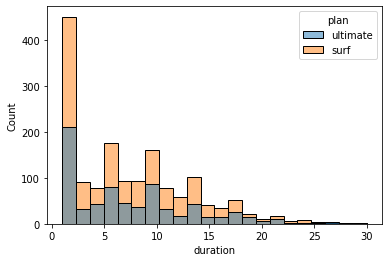

In [80]:
sns.histplot(all_data,x='duration',hue='plan')

array([<AxesSubplot:title={'center':'surf'}>,
       <AxesSubplot:title={'center':'ultimate'}>], dtype=object)

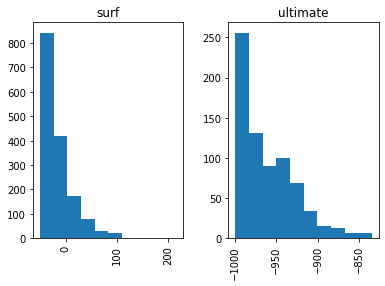

In [81]:
all_data.users_monthly_messages.hist(by=all_data['plan'])

In [82]:
all_data.groupby(['plan'])['users_monthly_messages'].agg(['mean','median']).reset_index()

,plan,mean,median
0,surf,-18.840432,-26.0
1,ultimate,-962.448611,-970.0


<AxesSubplot:xlabel='users_monthly_messages', ylabel='Count'>

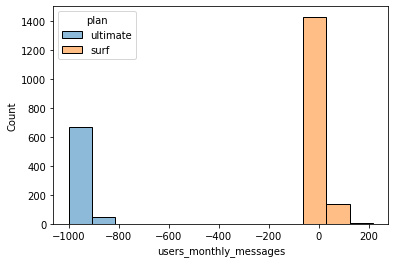

In [83]:
sns.histplot(all_data,x='users_monthly_messages',hue='plan')

array([<AxesSubplot:title={'center':'surf'}>,
       <AxesSubplot:title={'center':'ultimate'}>], dtype=object)

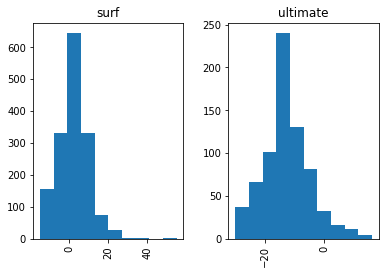

In [84]:
all_data.users_monthly_internet.hist(by=all_data['plan'])

In [85]:
all_data.groupby(['plan'])['users_monthly_internet'].agg(['mean','median']).reset_index()

,plan,mean,median
0,surf,1.670693,2.0
1,ultimate,-12.693056,-13.0


<AxesSubplot:xlabel='users_monthly_internet', ylabel='Count'>

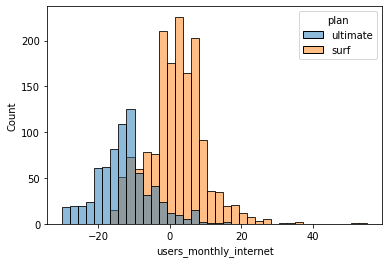

In [86]:
sns.histplot(all_data,x='users_monthly_internet',hue='plan')

In [87]:
print('Percentage of Surf plan users who use more call minutes than provided in the plan: {:.2%}'.format((all_data.loc[all_data['plan']=='surf', 'users_monthly_calls']>500).mean()))
print('Percentage of Ultimate plan users who use more call minutes than provided in the plan: {:.2%}'.format((all_data.loc[all_data['plan']=='ultimate', 'users_monthly_calls']>3000).mean()))

Percentage of Surf plan users who use more call minutes than provided in the plan: 2.41%
Percentage of Ultimate plan users who use more call minutes than provided in the plan: 0.00%


In [88]:
print('Percentage of Surf plan users who use more messages than provided in the plan: {:.2%}'.format((all_data.loc[all_data['plan']=='surf', 'users_monthly_messages']>50).mean()))
print('Percentage of Ultimate plan users who use more messages than provided in the plan: {:.2%}'.format((all_data.loc[all_data['plan']=='ultimate', 'users_monthly_messages']>1000).mean()))

Percentage of Surf plan users who use more messages than provided in the plan: 4.37%
Percentage of Ultimate plan users who use more messages than provided in the plan: 0.00%


In [89]:
print('Percentage of Surf plan users who use more GB than provided in the plan: {:.2%}'.format((all_data.loc[all_data['plan']=='surf', 'users_monthly_internet']>15).mean()))
print('Percentage of Ultimate plan users who use more GB than provided in the plan: {:.2%}'.format((all_data.loc[all_data['plan']=='ultimate', 'users_monthly_internet']>30).mean()))

Percentage of Surf plan users who use more GB than provided in the plan: 4.05%
Percentage of Ultimate plan users who use more GB than provided in the plan: 0.00%


The analysis shows that Surf plan users use more minutes than call limit and more messages than provided in the plan. Also they use more internet traffic than provided in the plan.

### Test the hypotheses

We will try to formulate hypotheses if the average revenue from users of Ultimate and Surf calling plans same or differ.
How you formulated the null and alternative hypotheses?
The null hypothesess is the average revenue from users of Ultimate and Surf calling plans are same.
rhe alternative - the average revenue from users of Ultimate and Surf calling plans are different

In [90]:
surf_data = all_data.loc[all_data['plan']=='surf', 'monthly_revenue']
ultimate_data = all_data.loc[all_data['plan']=='ultimate', 'monthly_revenue']
alpha = 0.05

results = st.ttest_ind(surf_data,ultimate_data,equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 0.0
We reject the null hypothesis


The analysis shows that the average revenue from users of Ultimate and Surf plans is different.

The average revenue from users in NY-NJ area is different from that of the users from other regions.
The null hypothesess is the average revenue from users in NY-NJ area is same from that of the users from other regions.
Alternative hypothesess - The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [63]:
data1 = all_data.loc[all_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'monthly_revenue']

data2 = all_data.loc[all_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'monthly_revenue']

alpha = 0.05

results = st.ttest_ind(data1, data2)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 5.772817324055275e-10
We reject the null hypothesis


In [64]:
# revenue of users in NY-NJ
ny_nj = all_data.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['monthly_revenue'] 
# revenue of users not in NY-NJ
other = all_data.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['monthly_revenue']
print('The average revenue from users in NY-NJ area: ', ny_nj.mean())
print('The average revenue from users not from NY_NJ: ', other.mean())

The average revenue from users in NY-NJ area:  94.86523334160051
The average revenue from users not from NY_NJ:  120.55944720982141


So we can see that the average revenue from users in NY-NJ area is different from that of the users from other regions.

The average revenue in NY-NJ area is ≈$95. 

Average revenue from users not from this region is ≈$121.

So we can see that the average revenue from users in NY-NJ area is different from that of the users from other regions.

### Conclusion

We opened and cleaned all the data set.
We calculated:

    1. The number of text messages sent per month
    2. The volume of data per month
    3. The number of calls made and minutes used per month
    4. The monthly revenue
    
In this analysis we described the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, variance, and standard deviation. Plot histograms. Describe the distributions.    
    
The analysis shows that Surf plan users use more minutes than call limit and more messages than provided in the plan. The Ultimate plan users use more messages than provided in the plan. But percentage betweeen of both plans is different. So percentage of Surf plan users who use more messages than provided in the plan is bigger than percentage of Ultimate plan users. We can see that Ultimate plan users and Surf plan users don't go over the limit of the plan.       
    
We tested two hypotheses:

- The average revenue from users of Ultimate and Surf calling plans differs.
- The average revenue from users in NY-NJ area is different from that of the users from other regions.  

We can conclude:

- Surf users often don't have anough call minuts, messages and internet.
- Ultimate plan is more profitable than the Surf plan.